In [43]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np

# ANN module
import torch
from torch import nn, optim                           # torch 에서 제공하는 신경망 기술, 손실함수, 최적화를 할 수 있는 함수들을 불러온다.
from torch.utils.data import DataLoader, Dataset      # 데이터를 모델에 사용할 수 있게 정리해주는 라이브러리.
import torch.nn.functional as F                       # torch 내의 세부적인 기능을 불러옴.

# Loss
from sklearn.metrics import mean_squared_error        # regression 문제의 모델 성능 측정을 위해서 MSE를 불러온다.

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer

## Load Data

In [122]:
data = pd.read_excel('medical_data_prepro_ver1.xlsx',sheet_name = 'sample')
data.head()

,Patient,Diagnosis,Date,Gender,Age,CMV IgM,CMV IgG,HSV IgM,HSV IgG,VZV IgM,...,Monocyte(#),Monocyte(%),Neutrophil(#),Neutrophil(%),ESR,CRP,CMV PCR[EYE],HSV type I PCR[EYE],HSV type II PCR[EYE],VZV PCR[EYE]
0,10429350,0,2021-09-06,1,38,0.0,20,0.5,30.0,0.332,...,0.59,12.1,1.77,36.3,2,0.4,NaN,NaN,NaN,NaN
1,10438034,0,2021-08-18,0,54,0.0,27,0.5,30.0,0.575,...,0.31,5.5,3.13,55.5,4,0.5,NaN,NaN,NaN,NaN
2,10520326,0,2021-11-03,0,59,0.0,53,0.5,30.0,0.416,...,0.39,5.6,4.56,65.5,45,1.8,NaN,NaN,NaN,NaN
3,1711961,0,2012-08-24,1,39,0.0,39,0.0,0.0,0.025,...,0.41,5.7,4.22,58.9,2,0.0,NaN,NaN,NaN,NaN
4,1746629,0,2022-02-27,1,74,0.0,51,0.5,30.0,0.297,...,0.54,5.7,6.59,69.0,55,7.6,NaN,NaN,NaN,NaN


In [123]:
df_X = data[['Gender', 'Age', 'CMV IgM', 'CMV IgG',
       'HSV IgM', 'HSV IgG', 'VZV IgM', 'VZV IgG', 'WBC COUNT',
       'Lymphocyte(#)', 'Lymphocyte(%)', 'Monocyte(#)', 'Monocyte(%)',
       'Neutrophil(#)', 'Neutrophil(%)', 'ESR', 'CRP']]
df_Y = data['Diagnosis']
df_X

,Gender,Age,CMV IgM,CMV IgG,HSV IgM,HSV IgG,VZV IgM,VZV IgG,WBC COUNT,Lymphocyte(#),Lymphocyte(%),Monocyte(#),Monocyte(%),Neutrophil(#),Neutrophil(%),ESR,CRP
0,1,38,0.0,20,0.5,30.0,0.332,114.0,4.88,2.31,47.3,0.59,12.1,1.77,36.3,2,0.40
1,0,54,0.0,27,0.5,30.0,0.575,964.2,5.64,2.10,37.2,0.31,5.5,3.13,55.5,4,0.50
2,0,59,0.0,53,0.5,30.0,0.416,634.8,6.96,1.86,26.7,0.39,5.6,4.56,65.5,45,1.80
3,1,39,0.0,39,0.0,0.0,0.025,1800.0,7.17,1.99,27.7,0.41,5.7,4.22,58.9,2,0.00
4,1,74,0.0,51,0.5,30.0,0.297,767.9,9.55,2.37,24.8,0.54,5.7,6.59,69.0,55,7.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,0,38,0.0,51,0.0,76.0,0.025,3100.0,9.30,1.93,20.8,0.41,4.4,6.90,74.2,24,1.11
76,0,55,0.0,36,0.5,30.0,0.205,1019.0,3.45,1.65,47.8,0.31,9.0,1.42,41.2,4,0.20
77,0,46,0.0,40,0.5,26.5,0.219,660.7,4.71,1.75,37.2,0.45,9.6,2.16,45.8,2,0.00
78,0,28,0.0,42,0.5,0.5,0.251,1851.0,7.34,1.60,21.9,0.21,2.9,5.11,69.6,14,2.20


In [103]:
df_X = df_X.to_numpy()
df_Y = df_Y.to_numpy().reshape((-1,1))

## train/test/val split

In [92]:
X_train, X_test, y_train, y_test = train_test_split(df_X, df_Y, test_size=0.2, random_state=2022)


## StratifiedShuffleSplit

In [124]:
from sklearn.model_selection import StratifiedShuffleSplit


split = StratifiedShuffleSplit(n_splits=1, test_size = 0.2, random_state = 2022)

for train_idx, test_idx in split.split(df_X,df_Y):
    X_train_strat = df_X.loc[train_idx]
    X_test_strat = df_X.loc[test_idx]
    y_train_strat = df_Y.loc[train_idx]
    y_test_strat = df_Y.loc[test_idx]

## 데이터 스케일링

In [125]:
# 데이터 스케일링
# sklearn에서 제공하는 MinMaxScaler 
# (X-min(X))/(max(X)-min(X))을 계산
scaler = MinMaxScaler() 
scaler.fit(X_train_strat)
X_train_scaled = scaler.transform(X_train_strat)
X_test_scaled = scaler.transform(X_test_strat)


## DecisionTreeClassifier (0,1,2 분류)

In [126]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train_scaled, y_train_strat)
print('모델의 정확도 :', round(dtc.score(X_test_scaled, y_test_strat), 4))

모델의 정확도 : 0.8125


In [127]:
X_train_scaled.shape

(64, 17)

In [129]:
X_train_scaled_mm = X_train_scaled.reshape(1088,1)
X_train_data = X_train_strat.to_numpy().reshape(1088,1)

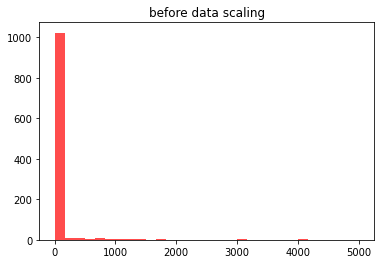

In [130]:
plt.hist(X_train_data, bins=30, color='red', alpha = 0.7)
plt.title('before data scaling')
plt.show()

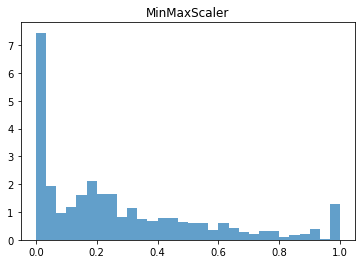

In [131]:
plt.hist(X_train_scaled_mm, bins=30, alpha = 0.7, density = True)
plt.title('MinMaxScaler')
plt.show()